In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Personal/Desktop/Project Mega/diabetes.csv")

In [3]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [4]:
for field in data.columns[:8]:
    print('number of 0 entries for "{field_name}" feature: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(data[field] == 0)
    ))


number of 0 entries for "Pregnancies" feature: 301
number of 0 entries for "Glucose" feature: 0
number of 0 entries for "BloodPressure" feature: 0
number of 0 entries for "SkinThickness" feature: 0
number of 0 entries for "Insulin" feature: 0
number of 0 entries for "BMI" feature: 0
number of 0 entries for "DiabetesPedigreeFunction" feature: 0
number of 0 entries for "Age" feature: 0


In [5]:
X = data.iloc[:,0:8]


In [6]:
y = data.iloc[:,8]

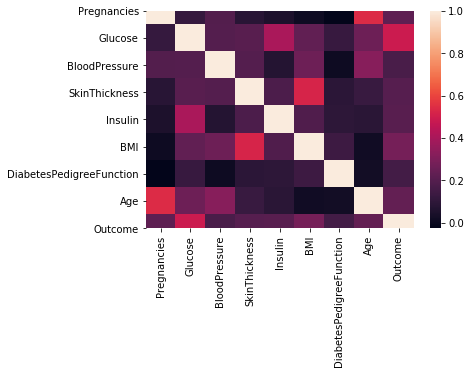

In [7]:
sns.heatmap(data.corr())

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.svm import SVC
classifier = SVC(gamma='auto',probability=True)

In [11]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[252  20]
 [ 42  86]]
0.7350427350427351


In [14]:
print(accuracy_score(y_test,y_pred))

0.845


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [16]:
def parameters_tuning(model,X_train,y_train,X_test,y_test,metrics,param_grid,clf=False,conf=False):
    """Tune parameters of the model using a grid search, this function just makes the job easier."""
    gcv=GridSearchCV(estimator=SVC(probability=True),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
    gcv.fit(X_train,y_train)
    prediction = gcv.predict(X_test)
    prob = gcv.predict_proba(X_test)[:,1]
    if clf == True:
        print (classification_report(y_test,prediction))
    if conf == True:
        print (confusion_matrix(y_test,prediction))
    print(gcv.best_params_)
    print(gcv.best_estimator_)
    print(roc_auc_score(y_test,prob),'Optimised Score')

In [17]:
k=SVC(probability=True)
k.fit(X_train,y_train)
k_pred = k.predict_proba(X_test)
print (roc_auc_score(y_test,k_pred[:,1]),"Initial Score")
wght_options = ['uniform','distance']
parameter_grid_k = dict(n_neighbors = range(1,18),weights=wght_options)
parameters_tuning(k,X_train,y_train,X_test,y_test,'roc_auc',parameter_grid_k)

0.8889734604779412 Initial Score


C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change

{'C': 10, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.9223920036764706 Optimised Score


In [18]:
from sklearn import preprocessing
import sklearn.preprocessing
n=(2,138,62,35,0,33.6,0.127,47)
scaler = StandardScaler()
m=sklearn.preprocessing.normalize([n])
s= scaler.fit_transform([n])
print(n)
print(m)
print(s)
print(k.predict(m))
print("Normal tuple ",k.predict([n]))
q=k.predict([n])
print(classifier.predict([n]))
print(classifier.predict(X_test))
if q == 1:
    print

(2, 138, 62, 35, 0, 33.6, 0.127, 47)
[[1.20703388e-02 8.32853377e-01 3.74180503e-01 2.11230929e-01
  0.00000000e+00 2.02781692e-01 7.66466514e-04 2.83652962e-01]]
[[0. 0. 0. 0. 0. 0. 0. 0.]]
[1]
Normal tuple  [0]
[0]
[0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 

In [19]:
from sklearn import preprocessing
import sklearn.preprocessing
import anvil.server

anvil.server.connect("LDYZUQD35CZQ3WMLTRDOK5FN-BZNT54QFIS2QXVGQ")
@anvil.server.callable
def predict(n):
    s=classifier.predict([n])
    if s==[1]:
        return "There is a chance for diabetes. Consult your Physician"
    else:
        return "You are safe! maintain the same"
    print(m)
    return s

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
